### Edge Detection
#### Should always be done using grayscale images

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
## directories
images = '../images'
saved_images = '../saved_images'
trans_images = '../trans_images'

In [3]:
cv2.Sobel?

Docstring:
Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
.   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
.   
.   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
.   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
.   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
.   or the second x- or y- derivatives.
.   
.   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
.   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
.   
.   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
.   
.   for the x-derivative, or transposed for the y-derivative.
.   
.   The function calculates an image derivative by convolving the image with the appropriat

In [12]:
img = cv2.imread(os.path.join(images, 'sachin.jpg'), 0)

In [13]:
## Define the sobel operators
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

#### The Sobel operator is an image processing technique used to compute the gradient (rate of change) of pixel intensities in an image. It helps detect edges by highlighting regions where the intensity of pixels changes significantly.

### Applications
1. Edge Detection: Identify object boundaries, contours, or regions of interest in an image.
2. Feature Extraction: Used in computer vision and machine learning for extracting features like edges and textures.
3. Image Segmentation: Divide an image into meaningful regions based on edges.


In [14]:
sobelx

array([[  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,  -4.,  -3.,   0.],
       [  0.,   0.,   0., ...,  -5.,  -4.,   0.],
       ...,
       [  0.,  11.,   8., ..., -15., -13.,   0.],
       [  0.,   8.,   2., ...,  -7.,  -5.,   0.],
       [  0.,   8.,   2., ...,  -4.,  -2.,   0.]])

In [35]:
final_sobel = cv2.add(sobelx, sobely)

In [36]:
final_sobel

array([[  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,  -8., -12., -12.],
       [  4.,   4.,   4., ...,  -6.,  -2.,   4.],
       ...,
       [ 46.,  54.,  42., ..., -38., -26.,  -8.],
       [  8.,  16.,  10., ..., -16.,  -8.,   0.],
       [  0.,   8.,   2., ...,  -4.,  -2.,   0.]])

In [37]:
thresh, binary_sobel = cv2.threshold(final_sobel, 60, 255, cv2.THRESH_BINARY) # binary categorization of pixels -> above 60, all pixels will be considered as white pixels

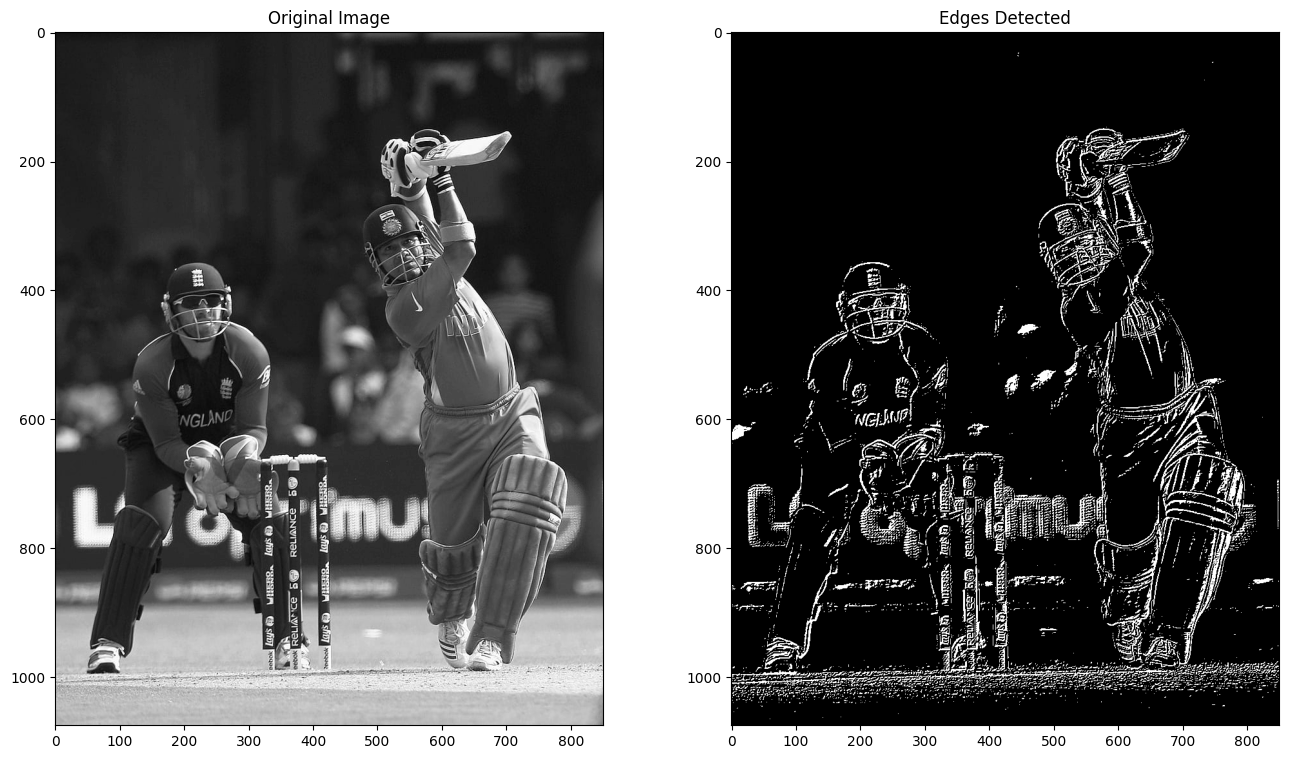

In [38]:
plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Edges Detected")
plt.imshow(binary_sobel, cmap='gray')

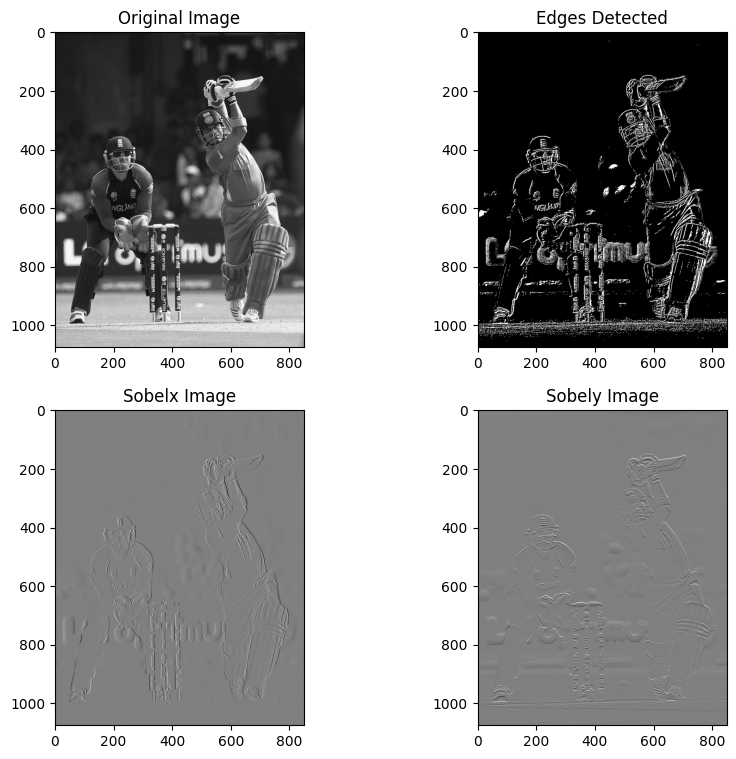

In [40]:
plt.figure(figsize=(10, 9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(2,2,2)
plt.title("Edges Detected")
plt.imshow(binary_sobel, cmap='gray')

plt.subplot(2,2,3)
plt.title('Sobelx Image')
plt.imshow(sobelx, cmap='gray')
plt.subplot(2,2,4)
plt.title("Sobely Image")
plt.imshow(sobely, cmap='gray')

### Canny edge detection

1. The Canny Edge Detection algorithm is a multi-step process to identify edges in an image with precision and low noise. It is widely used in computer vision due to its robustness and accuracy.

In [41]:
edges = cv2.Canny(img, 60, 255)

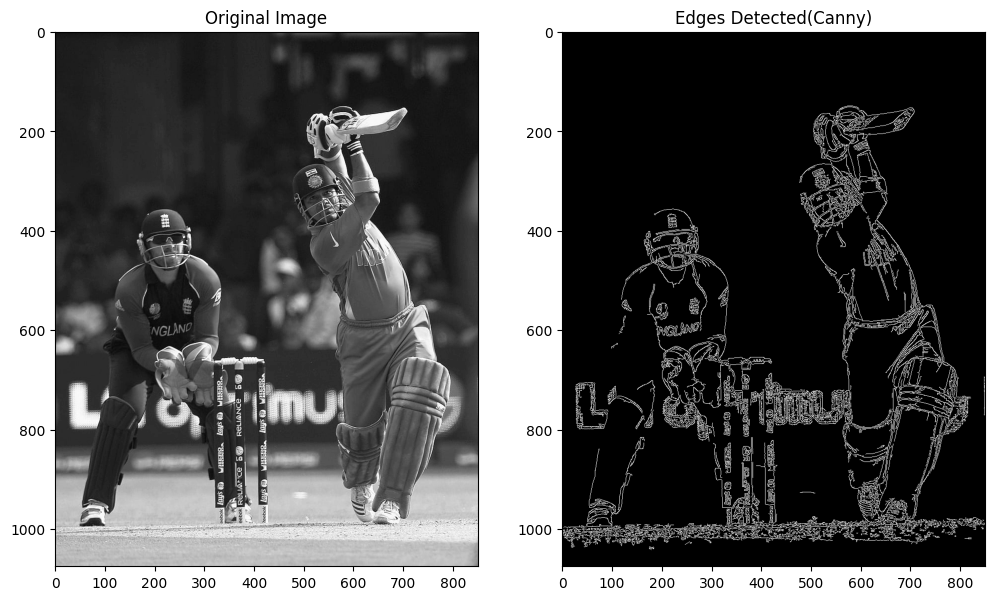

In [42]:
plt.figure(figsize=(12, 9))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Edges Detected(Canny)")
plt.imshow(edges, cmap='gray')

### Comparison plots


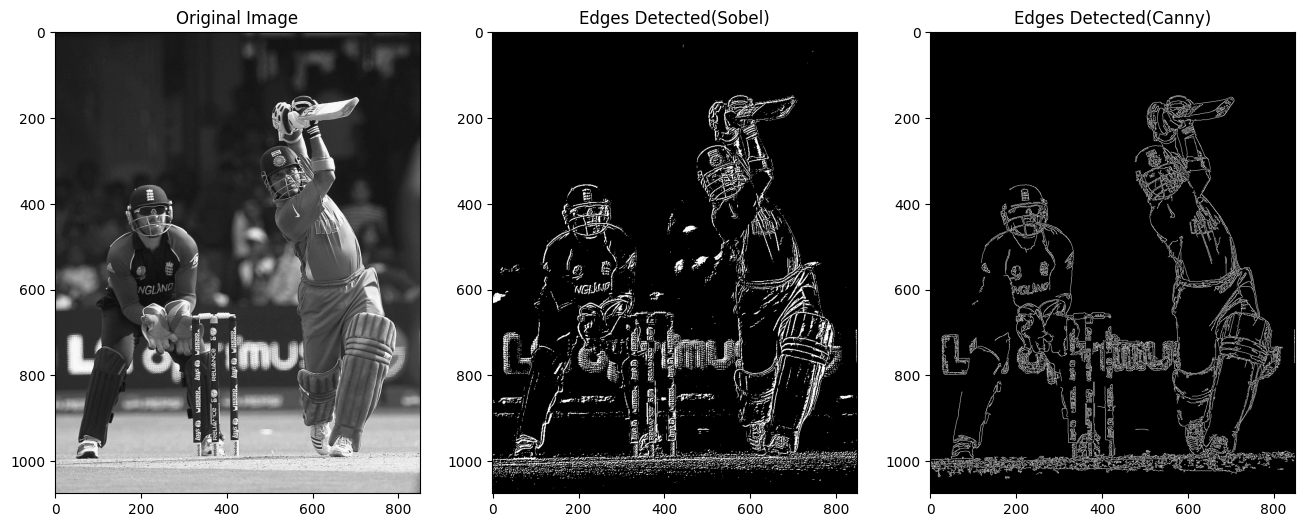

In [43]:
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.title("Edges Detected(Sobel)")
plt.imshow(binary_sobel, cmap='gray')
plt.subplot(1,3,3)
plt.title("Edges Detected(Canny)")
plt.imshow(edges, cmap='gray')

### As we can see, Canny edge detection is more effective than just simple Sobel detection. However Canny edge detection does include Sobel transforms, but only for noise reduction.

### A similar observation for circle.png

In [46]:
circle_img = cv2.imread(os.path.join(images, 'circle.png'), 0)
circle_img.shape

(492, 543)

In [47]:
sobelx_circ = cv2.Sobel(circle_img, cv2.CV_64F, 1, 0, ksize=3)
sobely_circ = cv2.Sobel(circle_img, cv2.CV_64F, 0, 1, ksize=3)

In [50]:
# For sobel analysis
final_sobel_circ = cv2.add(sobelx_circ, sobely_circ)
thresh_circ, binary_sobel_circ = cv2.threshold(final_sobel_circ, 60, 255, cv2.THRESH_BINARY)

In [51]:
# for canny edge detection
edges_circ = cv2.Canny(circle_img, 60, 255)

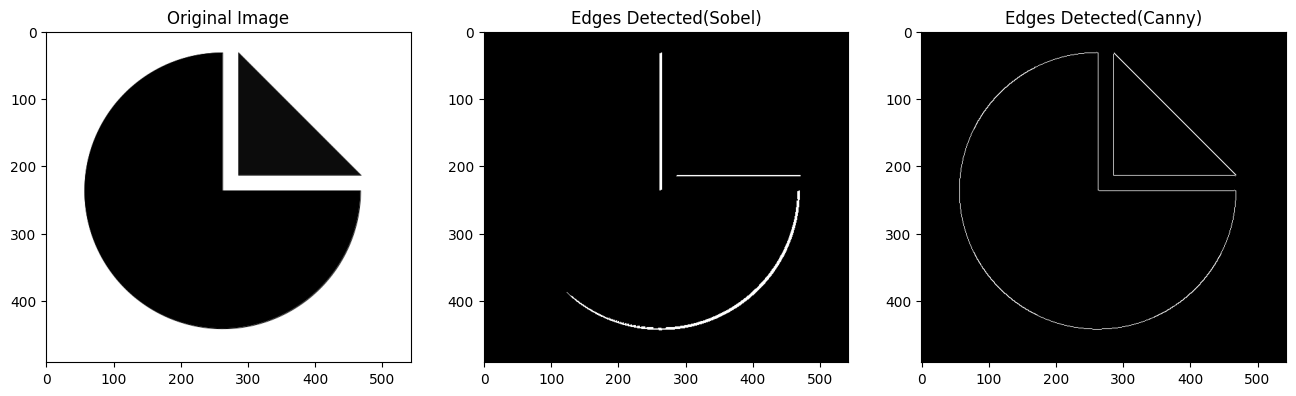

In [52]:
## Comparison
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(circle_img, cmap='gray')
plt.subplot(1,3,2)
plt.title("Edges Detected(Sobel)")
plt.imshow(binary_sobel_circ, cmap='gray')
plt.subplot(1,3,3)
plt.title("Edges Detected(Canny)")
plt.imshow(edges_circ, cmap='gray')